In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
file_path = r'mcdonalds.csv'
data = pd.read_csv(file_path)

In [4]:
data.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [5]:
modified_file_path = r'mcdonalds_modified.csv'
modified_data = pd.read_csv(modified_file_path)

In [6]:
 #DATA KEY
 #YES = 1 NO = 0
 #VISIT FREQUENCY HAS BEEN CHANGED TO VISITS PER YEAR
 #MORE THAN ONCE A WEEK: 96
 #ONCE A WEEK: 48
 #ONCE A MONTH: 12
 #ONCE IN THREE MONTHS: 4
 #ONCE A YEAR: 1
 #NEVER: 0

In [7]:
modified_data.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,Visits/year,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,4,Female
1,1,1,0,1,1,1,1,1,1,0,0,2,51,4,Female
2,0,1,1,1,1,1,0,1,1,1,0,1,62,4,Female
3,1,1,0,1,1,1,1,1,0,0,1,4,69,48,Female
4,0,1,0,1,1,1,1,0,0,1,0,2,49,12,Male


In [8]:
modified_data.describe()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,Visits/year
count,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000
mean,0.552650,0.907777,0.093599,0.867171,0.526497,0.900206,0.598761,0.644184,0.357880,0.198899,0.242946,0.777013,44.604955,16.071576
std,0.497391,0.289440,0.291371,0.339506,0.499469,0.299828,0.490318,0.478925,0.479542,0.399309,0.429010,3.116842,14.221178,22.464244
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-5.000000,18.000000,0.000000
25%,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,33.000000,1.000000
50%,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,45.000000,12.000000
75%,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,3.000000,57.000000,12.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,71.000000,96.000000


In [9]:
#PLOT FONT
csfont = {'fontname':'Comic Sans MS'}

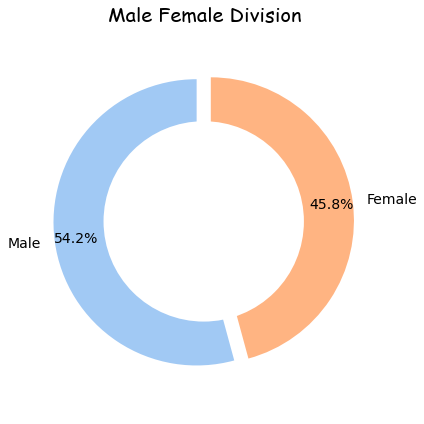

In [10]:
labels = ['Male','Female']
count = [modified_data.query('Gender == "Female"').Gender.count(),modified_data.query('Gender == "Male"').Gender.count()]
#COLORS
colors = sns.color_palette('pastel')[0:5]

#FIG CREATION
plt.figure(figsize=(6,6)) 
plt.title('Male Female Division',**csfont, fontsize=20)

gap = (0.05,0.05)
centre_circle = plt.Circle((0,0),0.70,fc='white')

plt.pie(
    count, colors = colors, labels=labels,  autopct='%1.1f%%', startangle=90, 
    pctdistance=0.85, textprops={'fontsize': 14},explode=gap
)
fig=plt.gcf()
plt.axis('equal')
fig.patch.set_facecolor('white')
plt.tight_layout()
fig.gca().add_artist(centre_circle)
plt.show()


Text(0.5, 0, 'Age')

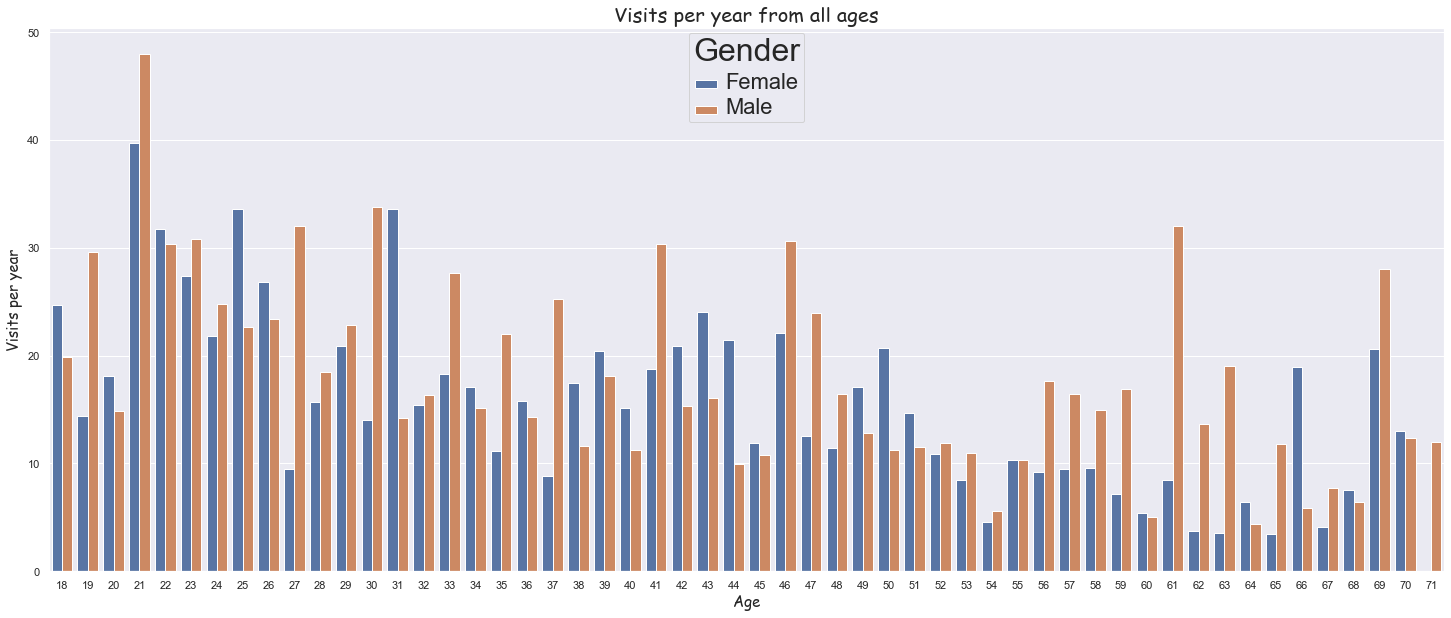

In [13]:
plt.figure(figsize=(25,10))
plt.title('Visits per year from all ages',**csfont, fontsize=20)
#STYLES
sns.set_theme(style="whitegrid")
sns.set_style("darkgrid")
#BARPLOT
ageplot = sns.barplot(
    x="Age", y="Visits/year", 
    hue="Gender",data=modified_data,
     ci=None
)
#LEGEND TEXT SIZE
plt.setp(ageplot.get_legend().get_texts(), fontsize='22') 
plt.setp(ageplot.get_legend().get_title(), fontsize='32')
#LABELS
plt.ylabel("Visits per year", **csfont, fontsize = 15)
plt.xlabel("Age", **csfont, fontsize = 15)



CONCLUSION:
The most visiting males are of the age 21 and 30 and the heighest visiting female customers are of 21 and 25

Text(0.5, 0, 'Gender')

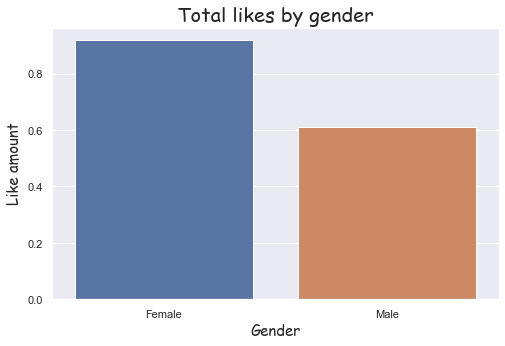

In [12]:
plt.figure(figsize=(8,5))
plt.title('Total likes by gender',**csfont, fontsize=20)
#BARPLOT
sns.barplot(
    x="Gender", y="Like",
    data=modified_data, 
    ci=None
)
#LABELS
plt.ylabel("Like amount", **csfont, fontsize = 15)
plt.xlabel("Gender", **csfont, fontsize = 15)

CONCLUSION:
Females generally seem to like McDonald's more

Text(0.5, 0, 'Age')

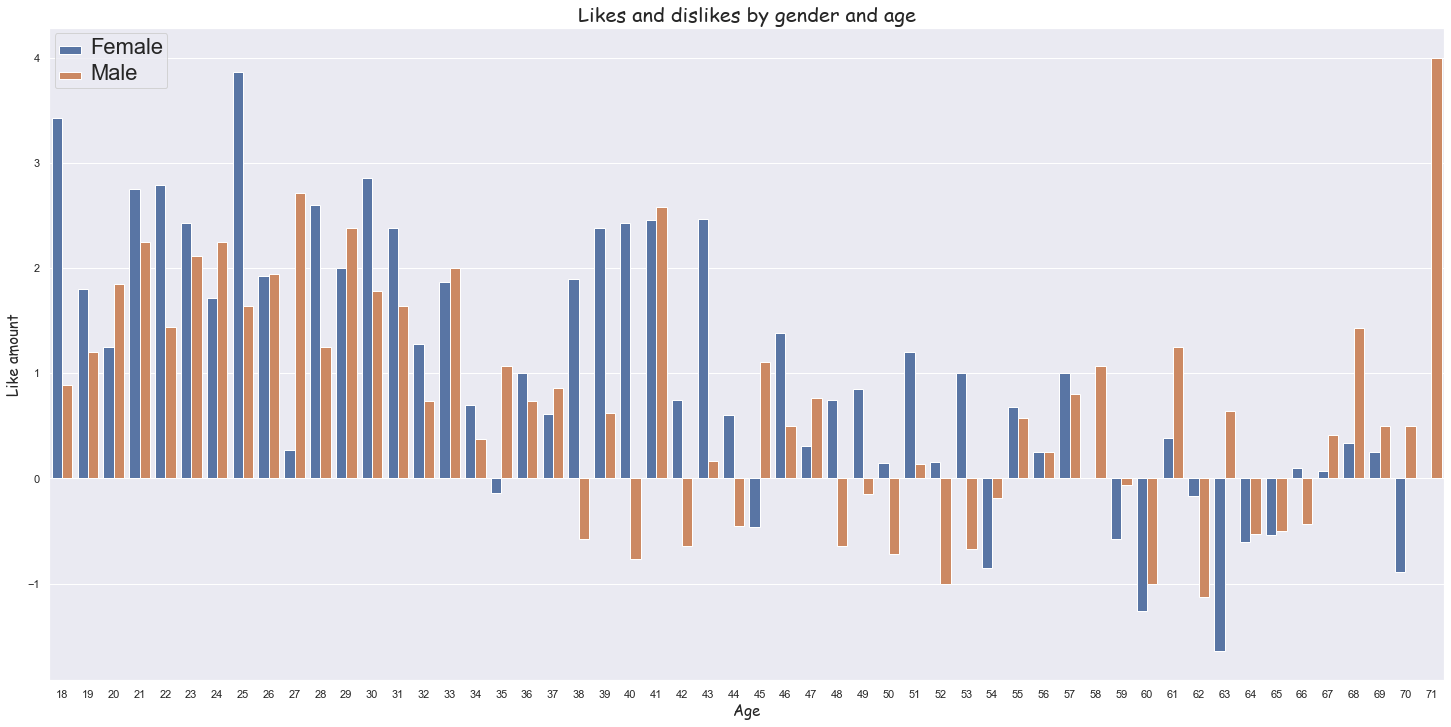

In [15]:
plt.figure(figsize=(25,12))
plt.title('Likes and dislikes by gender and age',**csfont, fontsize=20)
#BARPLOT
barplot = sns.barplot(
    data=modified_data, 
    y="Like", x="Age", 
    hue="Gender", 
    ci = None 
)
#LEGEND LOCATION AND FONT
plt.legend(loc='upper left')
plt.setp(barplot.get_legend().get_texts(), fontsize='22') 
plt.setp(barplot.get_legend().get_title(), fontsize='32')
#LABELS
plt.ylabel("Like amount", **csfont, fontsize = 15)
plt.xlabel("Age", **csfont, fontsize = 15)

CONCLUSION:
The dislike seems so be growing with an increase in age which can be plotted using a line graph for better understanding
Most of the dislikes seem to be by males of age >35

Text(0.5, 0, 'Age')

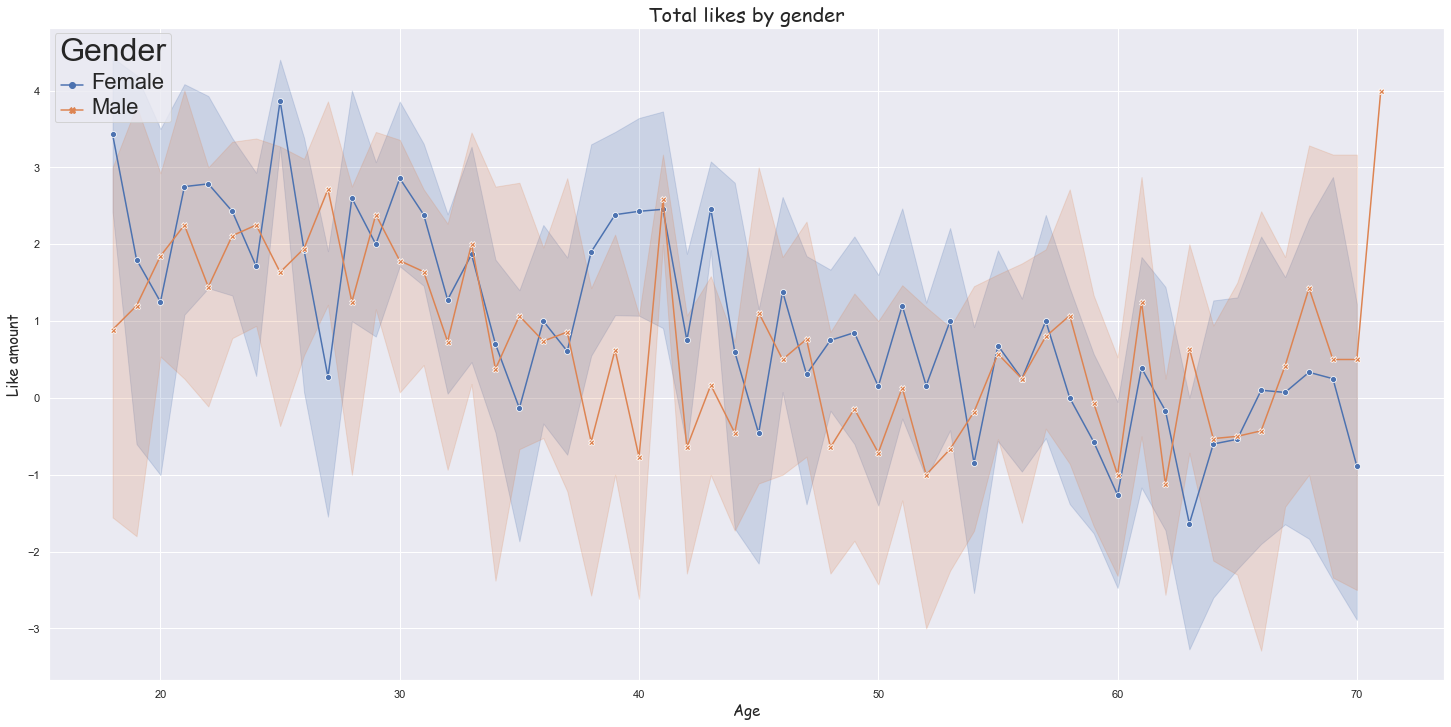

In [19]:
plt.figure(figsize=(25,12))
plt.title('Total likes by gender',**csfont, fontsize=20)
#LINEPLOT
lineplot = sns.lineplot(
    data=modified_data,
     x='Age', y='Like',
     hue='Gender',style="Gender",
      markers=True, dashes=False 
)
#LEGEND FONT
plt.setp(lineplot.get_legend().get_texts(), fontsize='22') 
plt.setp(lineplot.get_legend().get_title(), fontsize='32')
#LABELS
plt.ylabel("Like amount", **csfont, fontsize = 15)
plt.xlabel("Age", **csfont, fontsize = 15)

CONCLUSION:
Generally the dislike increases as age increases however with males there is a sharp increase in like on ages >70

Text(0.5, 0, 'Spicy')

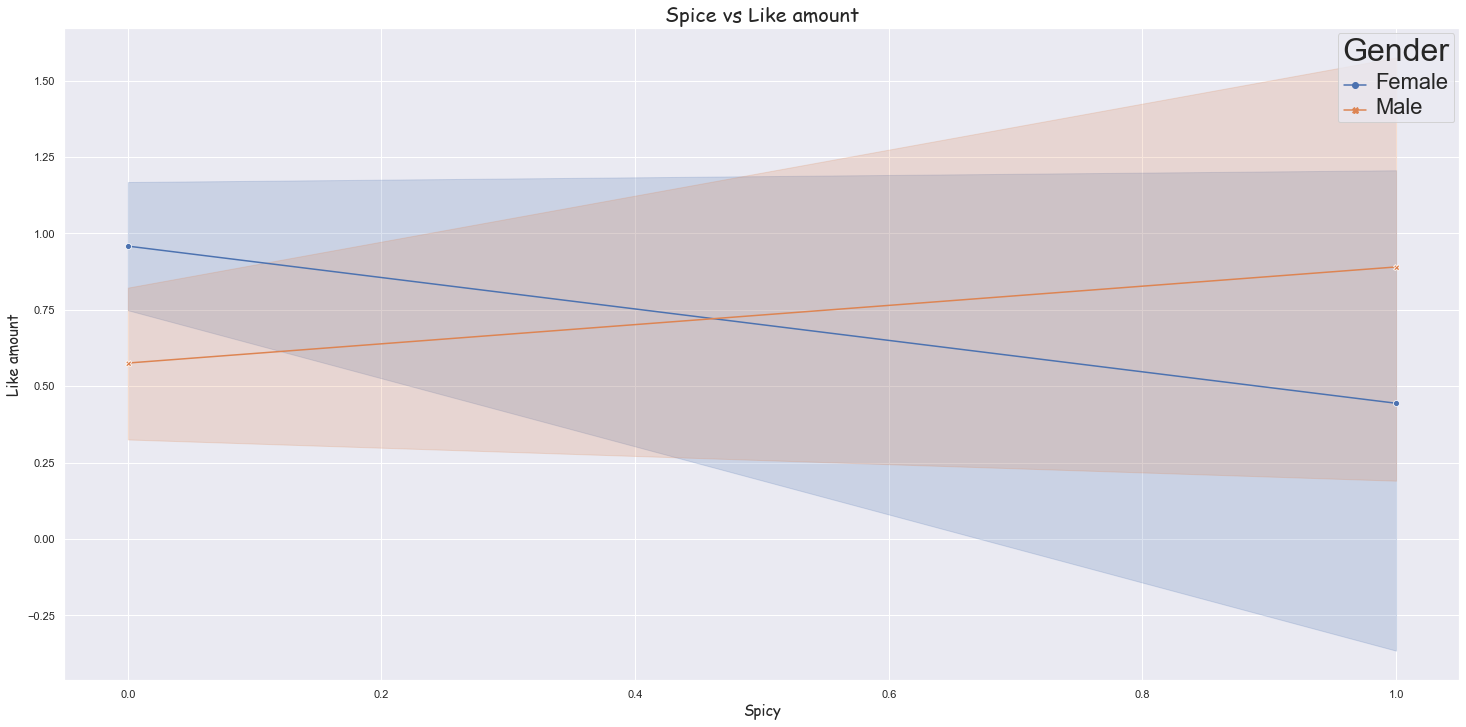

In [22]:
plt.figure(figsize=(25,12))
plt.title('Spice vs Like amount',**csfont, fontsize=20)
#LINEPLOT
lineplot = sns.lineplot(
    data=modified_data,
     x='spicy', y='Like',
     hue='Gender',style="Gender",
      markers=True, dashes=False 
)
#LEGEND FONT
plt.setp(lineplot.get_legend().get_texts(), fontsize='22') 
plt.setp(lineplot.get_legend().get_title(), fontsize='32')
#LABELS
plt.ylabel("Like amount", **csfont, fontsize = 15)
plt.xlabel("Spicy", **csfont, fontsize = 15)

Text(0.5, 0, 'Age')

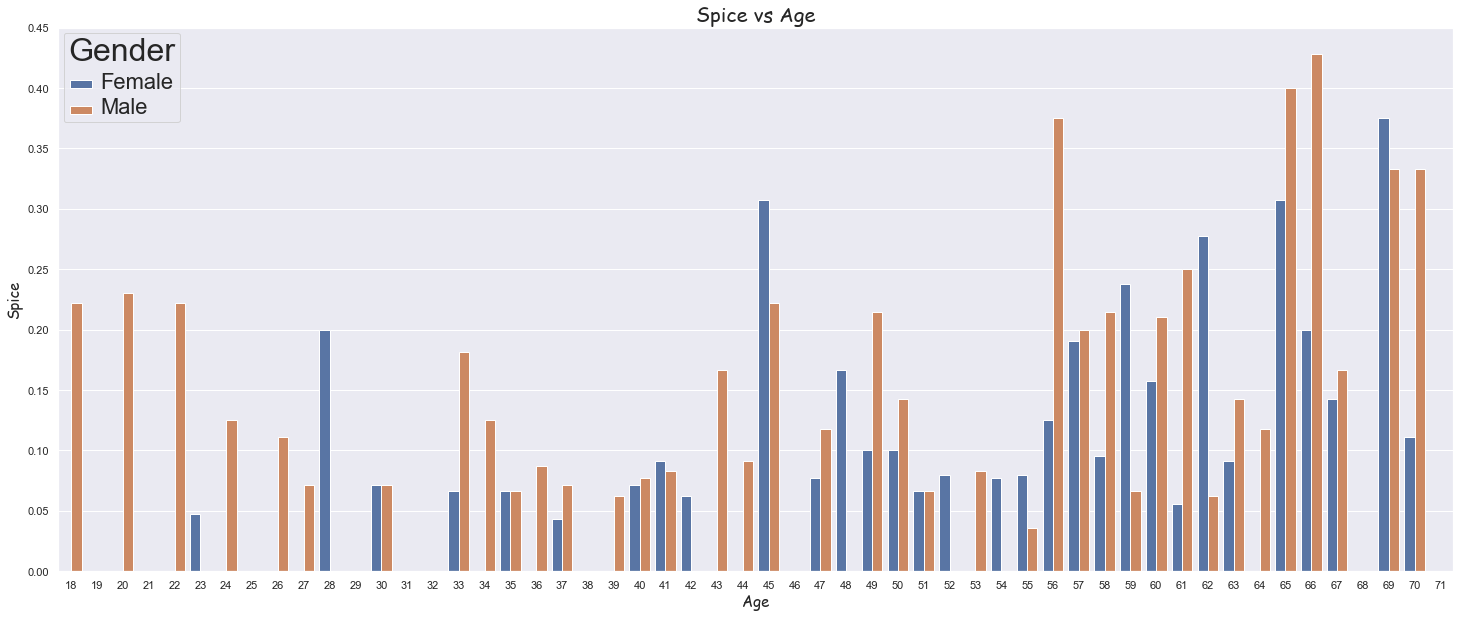

In [23]:
plt.figure(figsize=(25,10))
plt.title('Spice vs Age',**csfont, fontsize=20)
#STYLES
sns.set_theme(style="whitegrid")
sns.set_style("darkgrid")
#BARPLOT
ageplot = sns.barplot(
    x="Age", y="spicy", 
    hue="Gender",data=modified_data,
     ci=None
)
#LEGEND TEXT SIZE
plt.setp(ageplot.get_legend().get_texts(), fontsize='22') 
plt.setp(ageplot.get_legend().get_title(), fontsize='32')
#LABELS
plt.ylabel("Spice", **csfont, fontsize = 15)
plt.xlabel("Age", **csfont, fontsize = 15)

Older people seem to find the food more spicy

Text(0.5, 0, 'Visits')

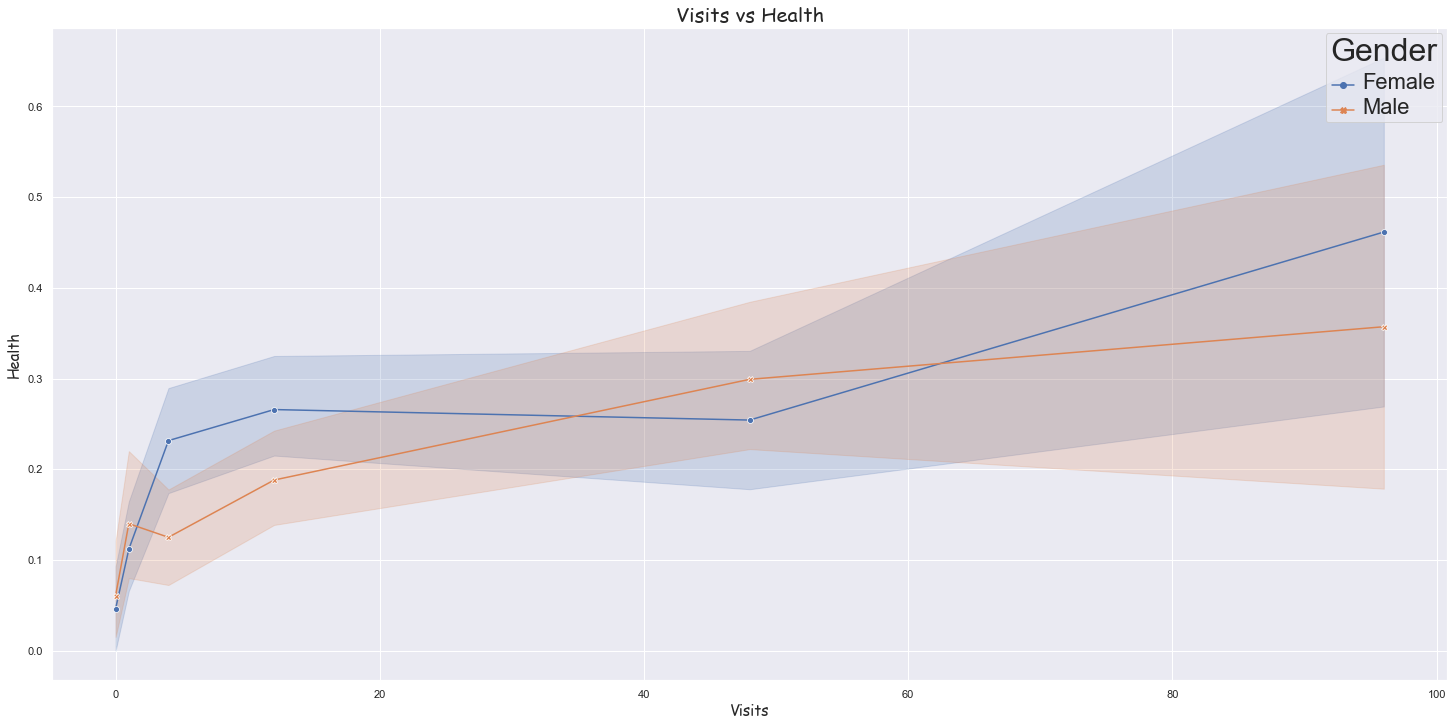

In [27]:
plt.figure(figsize=(25,12))
plt.title('Visits vs Health',**csfont, fontsize=20)
#LINEPLOT
lineplot = sns.lineplot(
    data=modified_data,
     x='Visits/year', y='healthy',
     hue='Gender',style="Gender",
      markers=True, dashes=False 
)
#LEGEND FONT
plt.setp(lineplot.get_legend().get_texts(), fontsize='22') 
plt.setp(lineplot.get_legend().get_title(), fontsize='32')
#LABELS
plt.ylabel("Health", **csfont, fontsize = 15)
plt.xlabel("Visits", **csfont, fontsize = 15)

The people who visit more often seem to think mcdonalds is healthy, and the people who dont visit at all seem to think it is unhealthy

In [44]:
#QUERYING DATA FOR AGE > %%
oldage_data = [modified_data.query('Age > 55')]
arr = []
for i in oldage_data:
    arr.append(i)

df = pd.DataFrame(arr[0])
df

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,Visits/year,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,4,Female
2,0,1,1,1,1,1,0,1,1,1,0,1,62,4,Female
3,1,1,0,1,1,1,1,1,0,0,1,4,69,48,Female
6,1,1,1,1,0,1,0,1,1,1,0,2,56,4,Female
8,0,0,0,1,1,0,0,0,1,0,1,-5,58,1,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1421,1,1,0,1,1,1,1,1,0,0,0,3,57,4,Female
1422,1,1,0,1,0,1,1,1,0,0,0,1,59,4,Female
1425,1,1,0,1,0,1,1,1,0,0,0,4,57,12,Male
1437,1,1,0,1,0,1,1,1,0,1,0,4,61,4,Female


Text(0.5, 0, 'Spicy')

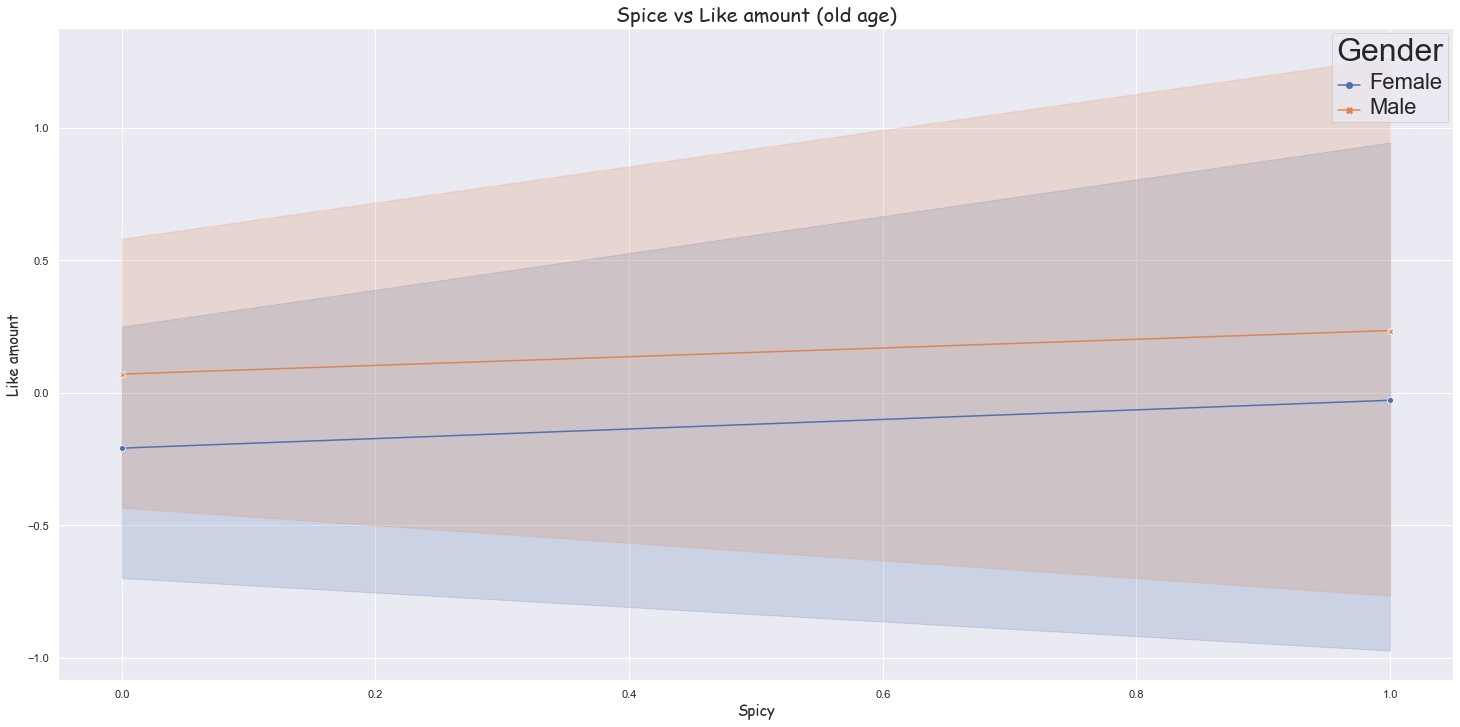

In [45]:
plt.figure(figsize=(25,12))
plt.title('Spice vs Like amount (old age)',**csfont, fontsize=20)
#LINEPLOT
lineplot = sns.lineplot(
    data=df,
     x='spicy', y='Like',
     hue='Gender',style="Gender",
      markers=True, dashes=False 
)
#LEGEND FONT
plt.setp(lineplot.get_legend().get_texts(), fontsize='22') 
plt.setp(lineplot.get_legend().get_title(), fontsize='32')
#LABELS
plt.ylabel("Like amount", **csfont, fontsize = 15)
plt.xlabel("Spicy", **csfont, fontsize = 15)

The spicy to like increase is reduced in old ages, however there is still a +ve trend